In [1]:
!pip install path

In [4]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 4.9 MB/s eta 0:00:0000:0100:010m


In [2]:
!pip install blob

In [3]:
!pip install pillow

In [6]:
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


In [5]:
files = os.listdir('/home/remy/code/Lalucarne51/mammo-analysis/sample')
files

['54818884.jpg',
 '59119681.jpg',
 '45909651.jpg',
 '43382331.jpg',
 '54882879.jpg',
 '62705306.jpg',
 '55898883.jpg',
 '47068980.jpg',
 '55409385.jpg',
 '55778133.jpg',
 '57024232.jpg',
 '60872123.jpg']

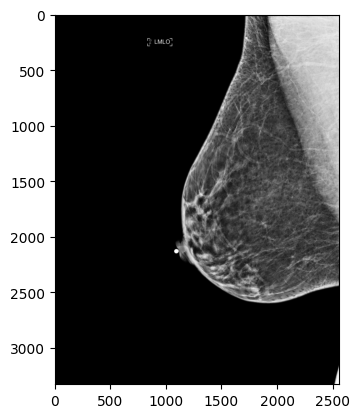

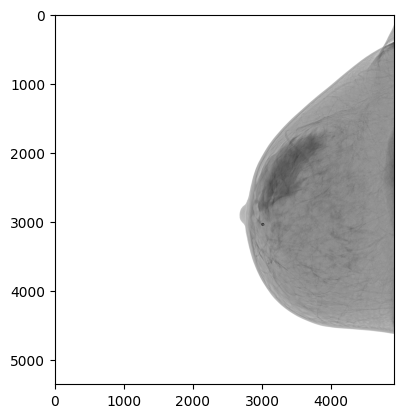

In [6]:
img = mpimg.imread("/home/remy/code/Lalucarne51/mammo-analysis/sample/43382331.jpg")
img2 = mpimg.imread("/home/remy/code/Lalucarne51/mammo-analysis/sample/45909651.jpg")
imgplot = plt.imshow(img, cmap='gray')
plt.show()
img2plot = plt.imshow(img2, cmap='gray')
plt.show()

In [29]:
img_rotate = img.rotate(180)
plt.imshow(img.rotate(180), cmap='gray')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

In [26]:
array1 = asarray(img)
array2 = asarray(img2)
array1[0]
array2[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [10]:
array = asarray(img2)
array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
array_scaled = array / 255
array_scaled

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

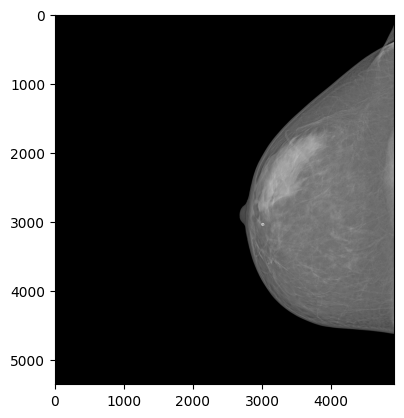

In [12]:
new_array = 1 - array_scaled
plt.imshow(new_array, cmap='gray')
plt.show()

In [19]:
def black_font_color(img_path:str):
    img = mpimg.imread(img_path)
    array = asarray(img)
    array_scaled = array / 255
    new_array = 1 - array_scaled
    return new_array

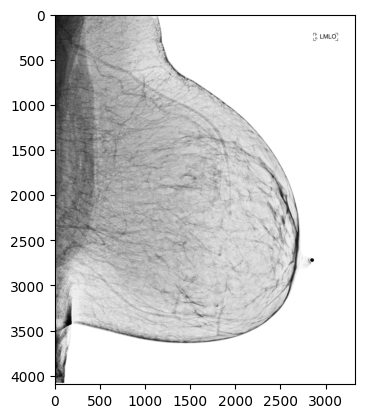

In [22]:
plt.imshow(black_font_color('/home/remy/code/Lalucarne51/mammo-analysis/data_processed/2139296168.jpg'), cmap='gray')

In [34]:
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254]], dtype=uint8)

In [52]:
def rotation_image(img_path:str, degree):
    array = mpimg.imread(img_path)
    img = Image.fromarray(array)
    rotate_image = img.rotate(degree)
    plt.imshow(rotate_image, cmap='gray')
    # rotate_image.save( "/home/pierregastellu/code/Lalucarne51/mammo-analysis/data_2/"+{name_img}+".jpeg", format="JPEG") #PATH A CHANGER
    plt.show()
    # return rotate_image

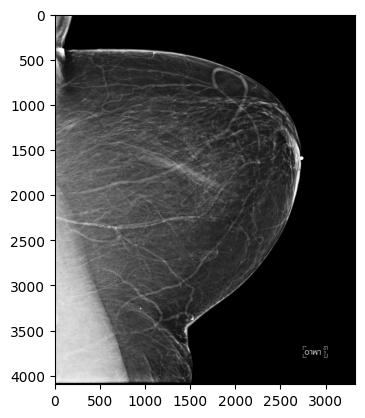

In [53]:
rotation_image('/home/remy/code/Lalucarne51/mammo-analysis/data_processed/2133499704.jpg', 180)

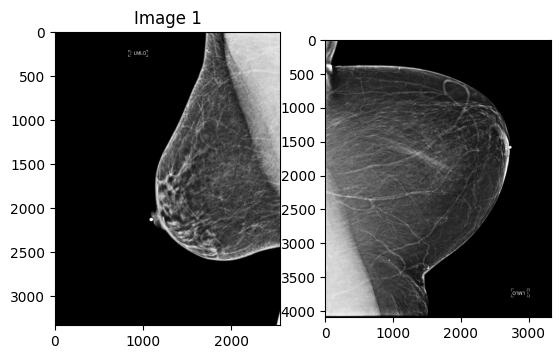

TypeError: Image data of dtype object cannot be converted to float

In [54]:
fig, axes = plt.subplots(1, 2)
# Afficher la première image dans le premier sous-graphique
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Image 1')

# Afficher la deuxième image dans le deuxième sous-graphique
axes[1].imshow(rotation_image('/home/remy/code/Lalucarne51/mammo-analysis/data_processed/2133499704.jpg', 180), cmap='gray')
axes[1].set_title('Image 2')

In [7]:
# Charger l'image en niveaux de gris
image = cv2.imread('/home/remy/code/Lalucarne51/mammo-analysis/data_processed/2132807803.jpg', cv2.IMREAD_GRAYSCALE)

# Trouver les contours de l'image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Trouver le plus grand contour
max_contour = max(contours, key=cv2.contourArea)

# Créer un masque noir avec la même taille que l'image
mask = np.zeros_like(image)

# Dessiner le plus grand contour sur le masque (remplir le contour avec la couleur blanche)
cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)

# Appliquer le masque à l'image d'origine
result = cv2.bitwise_and(image, mask)

# Afficher l'image résultante
cv2.imshow('Image résultante', result)
cv2.waitKey(0)
cv2.destroyAllWindows()